# ROTATIVIDADE CLIENTES TELCO (KNN-RANDOM FOREST-GLM)

> *Preveja o comportamento dos usuários para reter clientes. Você pode analisar todos os dados relevantes do cliente e desenvolver programas focados na retenção de clientes. (IBM Sample Data Sets)*

<br>
O dataset possui informações sobre rotatividade, serviços contratados (segurança,backup,proteção, etc), informações da conta, tipo de contrato e características dos clientes. O presente projeto seguirá os seguintes passos:<br>


* Análise exploratória dos dados
<br>
* Criação modelos de Machine Learning<br>
<br>
a) KNN<br>
b) Random Forest<br>
c) Regressão Logística

<br>

**Dataset:** https://www.kaggle.com/blastchar/telco-customer-churn

## 1. CARREGAR PACOTES E IMPORTAR OS DADOS

In [1]:
# Carregando pacotes
library(tidyverse)
library(gridExtra)
library(ISLR)
library(caret)
library(e1071)
library(DMwR)
library(plyr)
library(randomForest)
library(dominanceanalysis)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'ISLR' was built u

In [2]:
# Importando dados
df_telecom<- read.csv("telecom.csv")

In [3]:
# Summário dos dados
summary(df_telecom)

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             

In [4]:
# Visualizar as seis primeiras linhas do dataset
head(df_telecom)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [5]:
# Visualizar as seis últimas linhas do dataset
tail(df_telecom)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7043,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [6]:
# Visão geral do dataset
glimpse(df_telecom)

Rows: 7,043
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-~
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal~
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye~
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No~
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2~
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y~
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, ~
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o~
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No ~
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in~
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in~
$ TechSupport   

In [7]:
# Checando NAs
sapply(df_telecom,function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

* Removeremos a coluna ID pois não possui utilidade para o nosso propósito.
* A variável **TotalCharges** apresenta 11 valores NAs, resolvemos retirá-los uma vez que são poucos valores.
* Iremos recodificar as variáveis **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies** e **MultipleLines**, transformando os valores "No internet service" ou "No phone service" para "No".
* Transformaremos os fatores em números.

In [8]:
# Removendo variáveis sem utilidade
df_telecom<-df_telecom[-1]

In [9]:
# Recodificando variáveis
recode <- c(9:14)
for(i in 1:ncol(df_telecom[,recode])) {
        df_telecom[,recode][,i] <- as.factor(mapvalues
                                              (df_telecom[,recode][,i], from =c("No internet service"),to=c("No")))
}

In [10]:
# Recodificando variável MultipleLines
df_telecom$MultipleLines <- as.factor(mapvalues(df_telecom$MultipleLines, 
                                           from=c("No phone service"),
                                           to=c("No")))

In [11]:
# Visão geral do dataset
glimpse(df_telecom)

Rows: 7,043
Columns: 20
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal~
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye~
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No~
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2~
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y~
$ MultipleLines    <fct> No, No, No, No, No, Yes, Yes, No, Yes, No, No, No, Ye~
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o~
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No,~
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No, N~
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No, Y~
$ TechSupport      <fct> No, No, No, Yes, No, No, No, No, Yes, No, No, No, No,~
$ StreamingTV   

In [12]:
# Transformando categorias em números
categoria<- df_telecom %>%
select_if(is.factor) %>%
sapply(as.integer) -1

In [13]:
# Variáveis numéricas
numericas<-df_telecom %>%
select_if(is.numeric)

In [14]:
# Novo dataframe
df_telecom2<-as.data.frame(cbind(numericas,categoria))

In [15]:
# Visualizando dados
glimpse(df_telecom2)

Rows: 7,043
Columns: 20
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2~
$ MonthlyCharges   <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 89.10, 29.7~
$ TotalCharges     <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 820.50, 1949~
$ gender           <dbl> 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,~
$ Partner          <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,~
$ Dependents       <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,~
$ PhoneService     <dbl> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ MultipleLines    <dbl> 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,~
$ InternetService  <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1,~
$ OnlineSecurity   <dbl> 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,~
$ OnlineBackup     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,~
$ DeviceProtecti

In [16]:
# Transformando variáveis em fatores
to.factors <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- as.factor(df[[variable]])
  }
  return(df)
}

In [17]:
# Variáveis categóricas
variaveis_cat<- c("gender","SeniorCitizen","Partner","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
"Contract","PaperlessBilling","PaymentMethod","Churn")

In [18]:
# Transformando variáveis categóricas
df_telecom2<-to.factors(df_telecom2,variaveis_cat)

In [19]:
# Visão geral dos dados
glimpse(df_telecom2)

Rows: 7,043
Columns: 20
$ SeniorCitizen    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2~
$ MonthlyCharges   <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 89.10, 29.7~
$ TotalCharges     <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 820.50, 1949~
$ gender           <fct> 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,~
$ Partner          <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,~
$ Dependents       <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,~
$ PhoneService     <fct> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ MultipleLines    <fct> 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,~
$ InternetService  <fct> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1,~
$ OnlineSecurity   <fct> 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,~
$ OnlineBackup     <fct> 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,~
$ DeviceProtecti

In [20]:
# Checando NAs
sapply(df_telecom2,function(x) sum(is.na(x)))

SeniorCitizen           tenure   MonthlyCharges     TotalCharges 
               0                0                0               11 
          gender          Partner       Dependents     PhoneService 
               0                0                0                0 
   MultipleLines  InternetService   OnlineSecurity     OnlineBackup 
               0                0                0                0 
DeviceProtection      TechSupport      StreamingTV  StreamingMovies 
               0                0                0                0 
        Contract PaperlessBilling    PaymentMethod            Churn 
               0                0                0                0

In [21]:
# Remover NAs
df_telecom2<-na.omit(df_telecom2)

In [22]:
# Visão geral dos dados sem NAs
glimpse(df_telecom2)

Rows: 7,032
Columns: 20
$ SeniorCitizen    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2~
$ MonthlyCharges   <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 89.10, 29.7~
$ TotalCharges     <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 820.50, 1949~
$ gender           <fct> 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,~
$ Partner          <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,~
$ Dependents       <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,~
$ PhoneService     <fct> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ MultipleLines    <fct> 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,~
$ InternetService  <fct> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1,~
$ OnlineSecurity   <fct> 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,~
$ OnlineBackup     <fct> 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,~
$ DeviceProtecti

**Dicionário das variáveis**
<br>
customerID - customer id <br>
gender - client gender (male / female) <br>
SeniorCitizen - is the client retired (1, 0) <br>
Partner - is the client married (Yes, No) <br>
tenure - how many months a person has been a client of the company <br>
PhoneService - is the telephone service connected (Yes, No) <br>
MultipleLines - are multiple phone lines connected (Yes, No, No phone service) <br>
InternetService - client's Internet service provider (DSL, Fiber optic, No) <br>
OnlineSecurity - is the online security service connected (Yes, No, No internet service) <br>
OnlineBackup - is the online backup service activated (Yes, No, No internet service) <br>
DeviceProtection - does the client have equipment insurance (Yes, No, No internet service) <br>
TechSupport - is the technical support service connected (Yes, No, No internet service) <br>
StreamingTV - is the streaming TV service connected (Yes, No, No internet service) <br>
StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service) <br>
Contract - type of customer contract (Month-to-month, One year, Two year) <br>
PaperlessBilling - whether the client uses paperless billing (Yes, No) <br>
PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) <br>
MonthlyCharges - current monthly payment <br>
TotalCharges - the total amount that the client paid for the services for the entire time <br>
Churn - whether there was a churn (Yes or No)

### PLOTANDO VARIÁVEIS

In [23]:
# Plotando variável gender
plot1<-df_telecom2 %>%
ggplot(aes(gender,fill=gender)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Feminino","Masculino")) +
labs(title="Gênero",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [24]:
# Plotando variável SeniorCitizen
plot2<-df_telecom2 %>%
ggplot(aes(SeniorCitizen,fill=SeniorCitizen)) +
geom_bar(alpha=.5,show.legend=F) + 
scale_x_discrete(labels = c("Ativo","Aposentado")) +
labs(title="Cliente Aposentado",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [25]:
# Plotando a variável Partner
plot3<-df_telecom2 %>%
ggplot(aes(Partner,fill=Partner)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sim")) +
labs(title="O Cliente é Casado?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

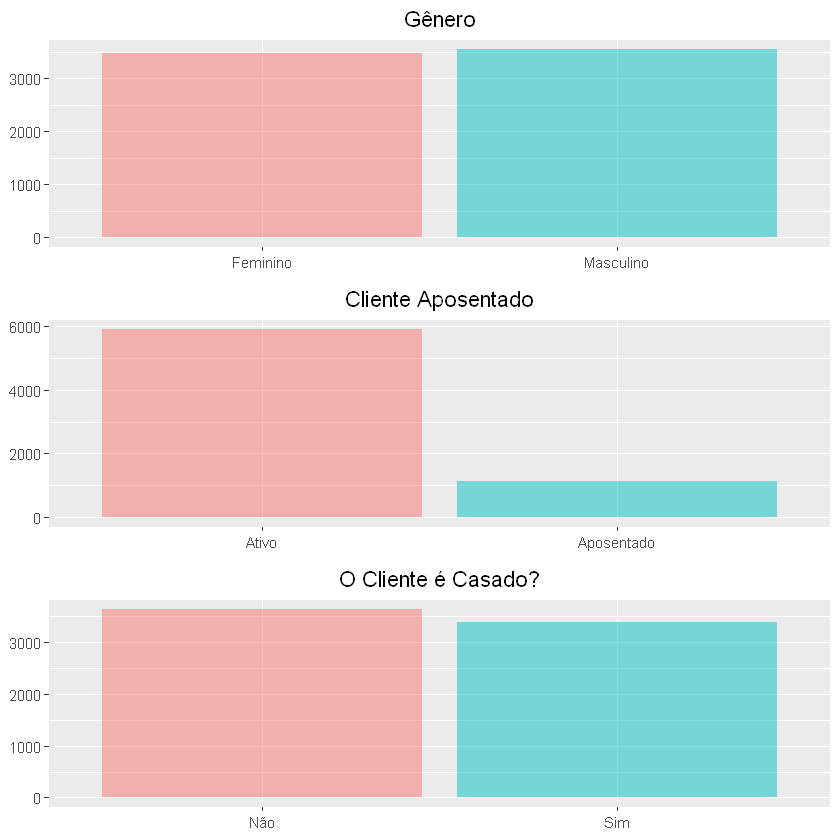

In [26]:
grid.arrange(plot1,plot2,plot3)

In [27]:
# Plotando variável PhoneService
plot4<-df_telecom2 %>%
ggplot(aes(PhoneService,fill=PhoneService)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sim")) +
labs(title="O Cliente Possui Plano de Telefone?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [28]:
# Plotando variável MultipleLines
plot5<-df_telecom2 %>%
ggplot(aes(MultipleLines,fill=MultipleLines)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sem Serviço Telefônico","Sim")) +
labs(title="O Cliente Possui +1 Linhas Telefônicas",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [29]:
# Plotando variável InternetService
plot6<-df_telecom2 %>%
ggplot(aes(InternetService,fill=InternetService)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("DSL","Fibra Ótica","Sem Internet")) +
labs(title="Serviço de Internet do Cliente",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

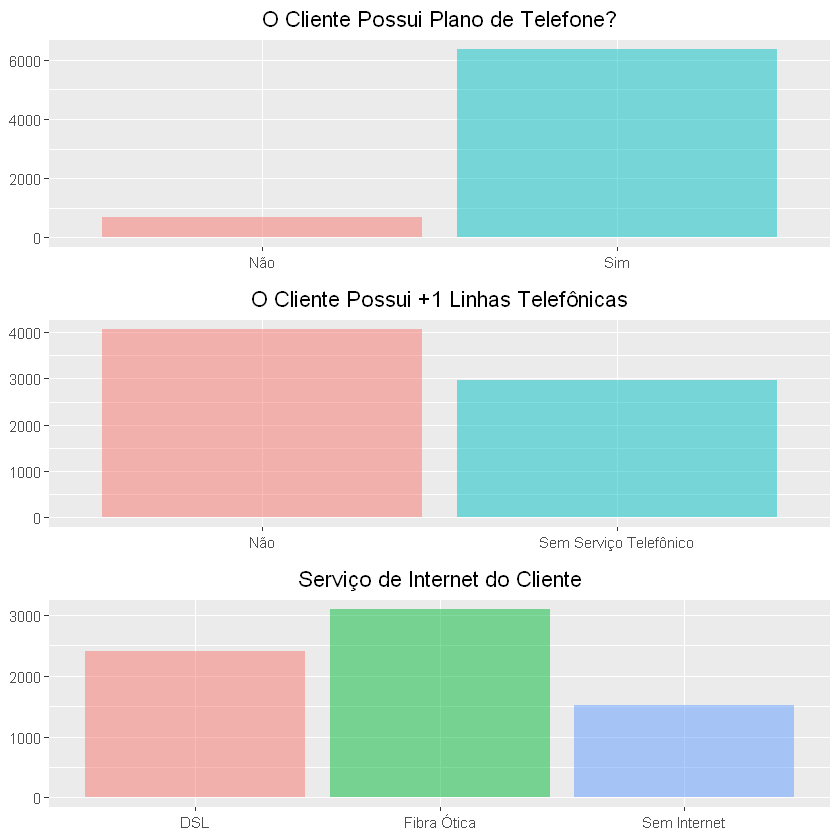

In [30]:
grid.arrange(plot4,plot5,plot6)

In [31]:
# Plotando variável OnlineSecurity
plot7<-df_telecom2 %>%
ggplot(aes(OnlineSecurity,fill=OnlineSecurity)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sem Serviço de Internet","Sim"))+
labs(title="O Cliente Possui Serviço de Segurança Online?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [32]:
# Plotando variável OnlineBackup
plot8<-df_telecom2 %>%
ggplot(aes(OnlineBackup,fill=OnlineBackup)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sem Serviço de Internet","Sim")) +
labs(title="O Cliente Possui Serviço de Backup Online?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [33]:
# Plotando variável DeviceProtection
plot9<-df_telecom2 %>%
ggplot(aes(DeviceProtection,fill=DeviceProtection)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sem Serviço de Internet","Sim"))+
labs(title="O Cliente Possui Serviço de Seguro de Equipamento?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

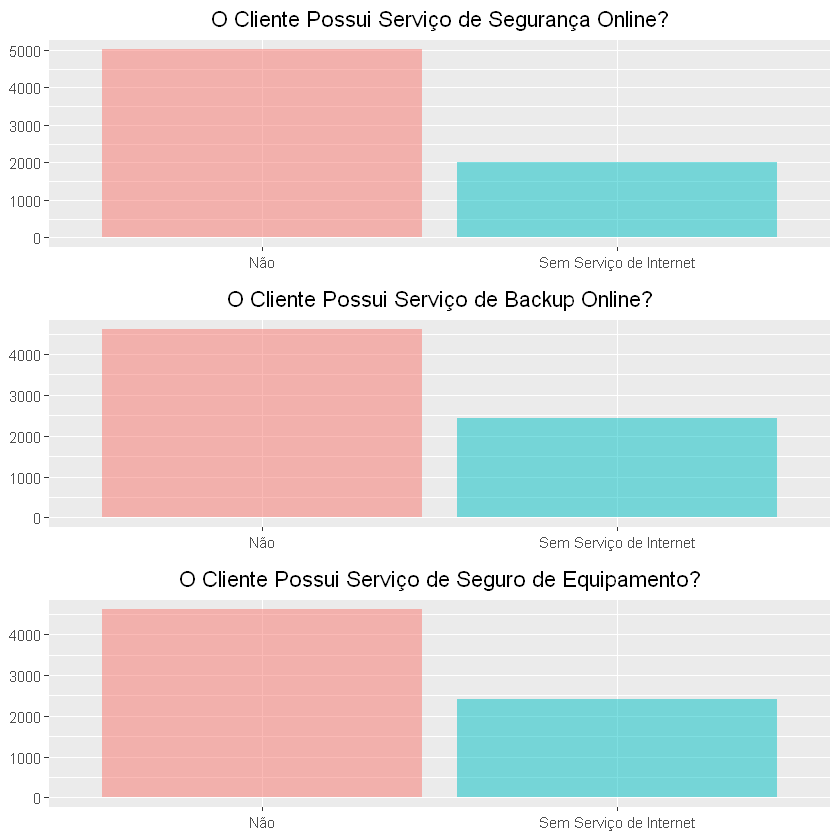

In [34]:
grid.arrange(plot7,plot8,plot9)

In [35]:
# Plotando variável TechSupport
plot10<-df_telecom2 %>%
ggplot(aes(TechSupport,fill=TechSupport)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sem Serviço de Internet","Sim"))+
labs(title="O Cliente Possui Serviço de Suporte Técnico?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [36]:
# Plotando variável StreaminTV
plot11<-df_telecom2 %>%
ggplot(aes(StreamingTV,fill=StreamingTV)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sem Serviço de Internet","Sim"))+
labs(title="O Cliente Possui Serviço de Streaming de TV?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [37]:
# Plotando variável StreamingMovies
plot12<-df_telecom2 %>%
ggplot(aes(StreamingMovies,fill=StreamingMovies)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sem Serviço de Internet","Sim"))+
labs(title="O Cliente Possui Serviço de Streaming de Cinema?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

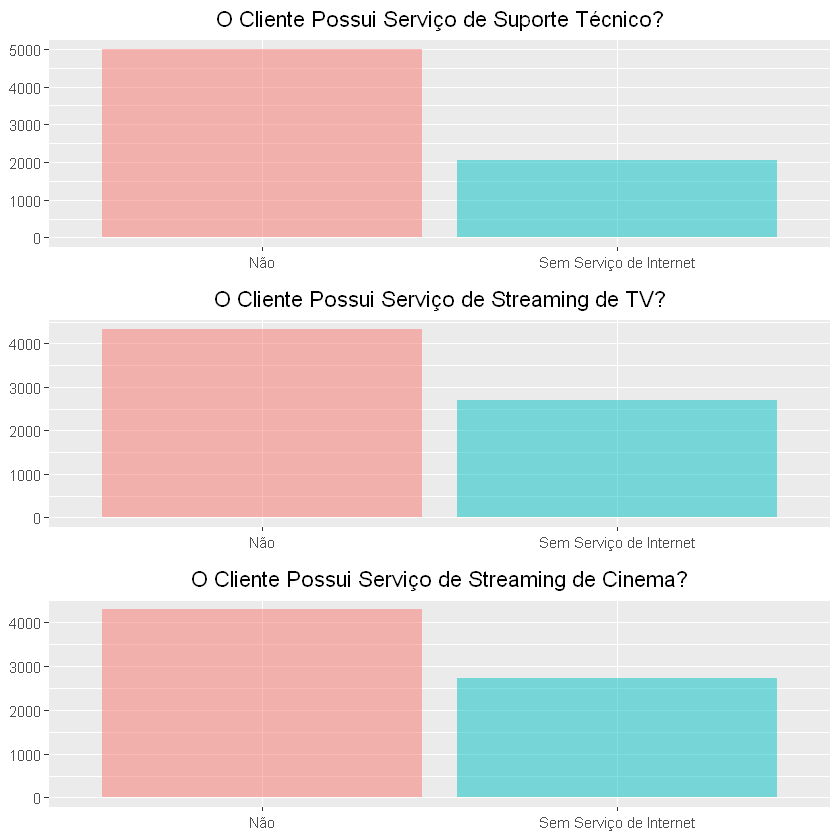

In [38]:
grid.arrange(plot10,plot11,plot12)

In [39]:
# Plotando variável Contract
plot13<-df_telecom2 %>%
ggplot(aes(Contract,fill=Contract)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Mensal","12 Meses","24 Meses"))+
labs(title="Tipo de Contrato",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [40]:
# Plotando variável PaperlessBilling
plot14<-df_telecom2 %>%
ggplot(aes(PaperlessBilling,fill=PaperlessBilling)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sim"))+
labs(title="O Cliente Utiliza Fatura Impressa?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [41]:
# Plotando variável PaymentMethod
plot15<-df_telecom2 %>%
ggplot(aes(PaymentMethod,fill=PaymentMethod)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Transferência Bancária","Cartão de Crédito","Cheque Eletrônico","Cheque Enviado"))+
labs(title="Método de Pagamento",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

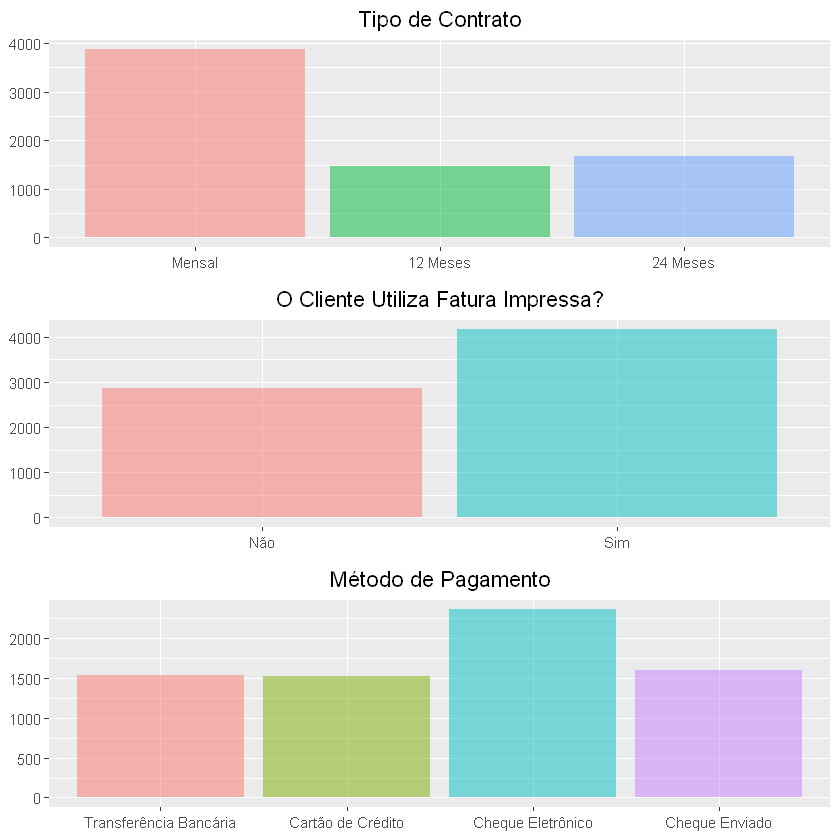

In [42]:
grid.arrange(plot13,plot14,plot15)

In [43]:
# Plotando variável Churn
plot16<-df_telecom2 %>%
ggplot(aes(Churn,fill=Churn)) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sim"))+
labs(title="Houve Perda do Cliente?",y=NULL,x=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [44]:
# Plotando variável tenure
plot17<-df_telecom2 %>%
ggplot(aes(tenure)) +
geom_histogram(fill = "blue", color = "yellow", alpha = .5, bins = 40, boundary = 5) +
labs(title="Tempo Como Cliente",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [45]:
# Plotando variável MonthlyCharges
plot18<-df_telecom2 %>%
ggplot(aes(MonthlyCharges)) +
geom_histogram(fill = "lightblue", color = "green", alpha = .5, bins = 40, boundary = 5) +
labs(title="Pagamento Mensal Atual",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

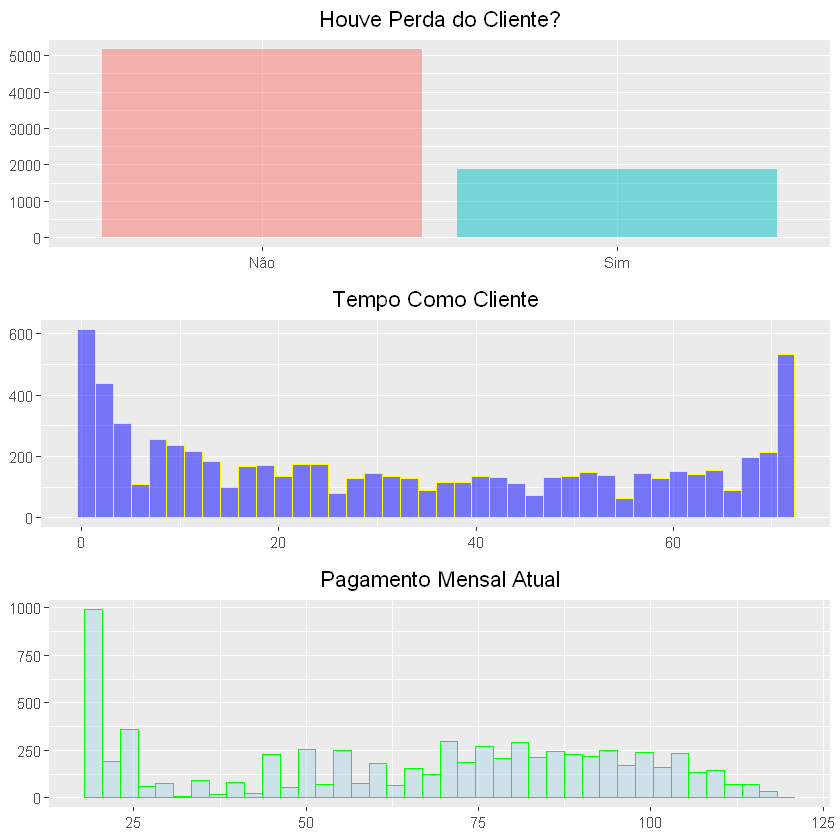

In [46]:
grid.arrange(plot16,plot17,plot18)

In [47]:
# Plotando variável tenure
plot19<-df_telecom2 %>%
ggplot(aes(TotalCharges)) +
geom_histogram(fill = "blue", color = "yellow", alpha = .5, bins = 40, boundary = 5) +
labs(title="Valor Total Gasto Pelo Cliente",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [48]:
# Plotando variável Dependents
plot20<-df_telecom2 %>%
ggplot(aes(Dependents,fill=as.factor(Dependents))) +
geom_bar(alpha=.5,show.legend=F) +
scale_x_discrete(labels = c("Não","Sim"))+
labs(title="Possui Dependentes?",y=NULL,x=NULL) +
theme(plot.title = element_text(hjust = 0.5))

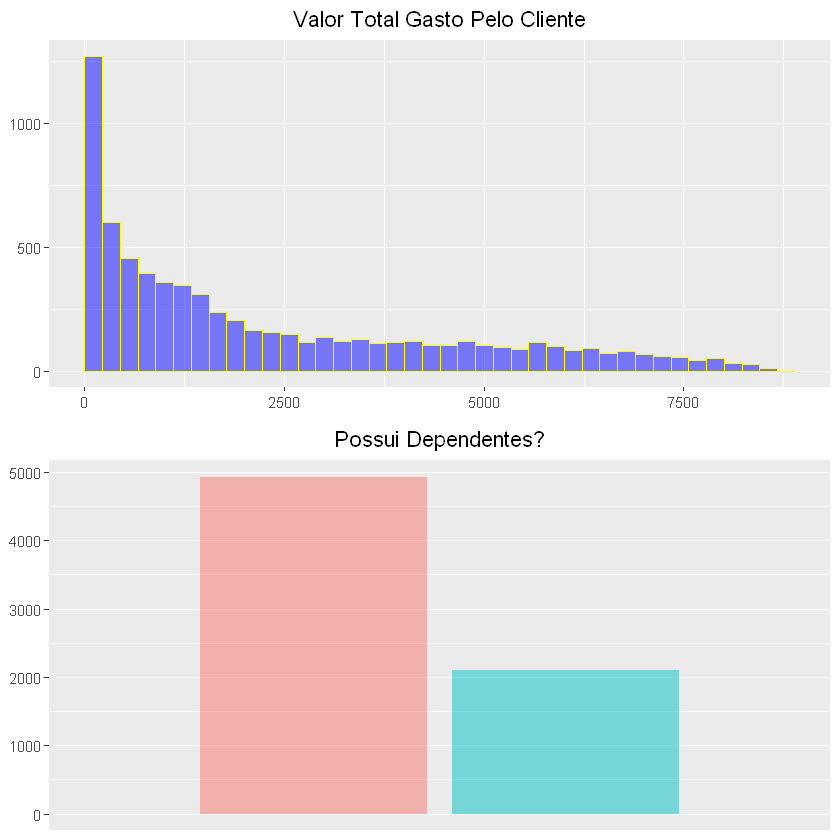

In [49]:
grid.arrange(plot19,plot20)

### VARIÁVEIS NUMÉRICAS E VARIÁVEL CHURN

In [50]:
# Plotando MonthlyCharges e Churn
plot21<-df_telecom2 %>%
ggplot(aes(MonthlyCharges,fill=factor(Churn,labels=c("Não","Sim")))) +
geom_density(alpha=.5) +
labs(title="Relação Pagamento Mensal Atual e Churn",y=NULL,x=NULL,fill="Churn") +
theme(plot.title = element_text(hjust = 0.5))

In [51]:
# Plotando TotalCharges e Churn
plot22<-df_telecom2 %>%
ggplot(aes(TotalCharges,fill=factor(Churn,labels=c("Não","Sim")))) +
geom_density(alpha=.5) +
labs(title="Relação Gasto Total e Churn",y=NULL,x=NULL,fill="Churn") +
theme(plot.title = element_text(hjust = 0.5))

In [52]:
# Plotando tenure e Churn
plot23<-df_telecom2 %>%
ggplot(aes(tenure,fill=factor(Churn,labels=c("Não","Sim")))) +
geom_density(alpha=.5) +
labs(title="Relação Meses Como Cliente e Churn",y=NULL,x=NULL,fill="Churn") +
theme(plot.title = element_text(hjust = 0.5))


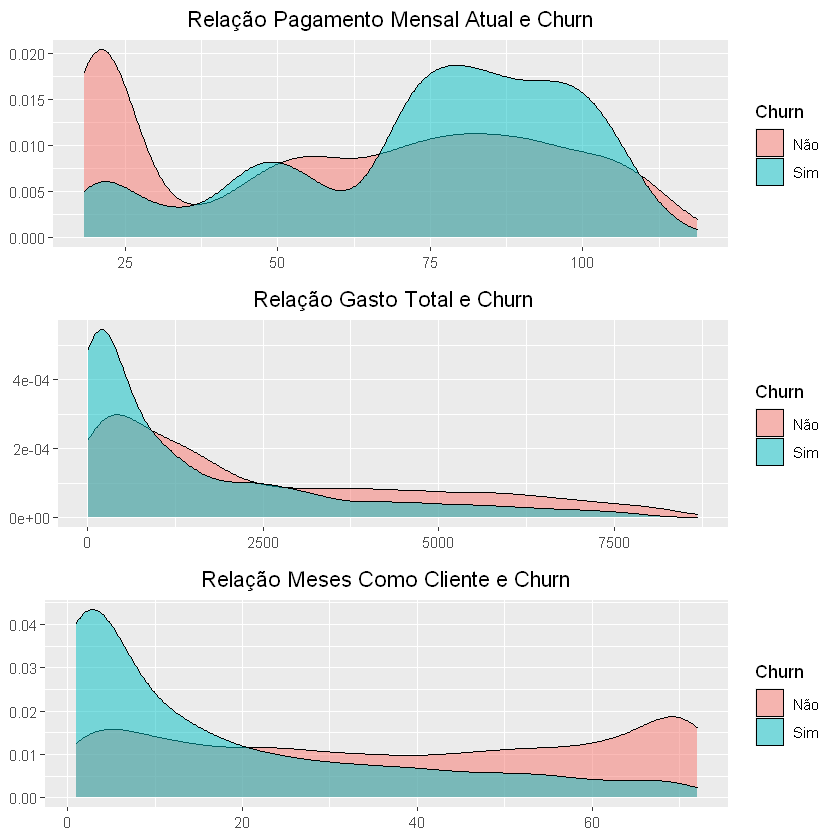

In [53]:
grid.arrange(plot21,plot22,plot23)

In [54]:
# Correlação entre as variáveis numéricas
df_telecom2 %>%
select_if(is.numeric) %>%
cor()

,tenure,MonthlyCharges,TotalCharges,Dependents
tenure,1.0000000,0.2468618,0.82588046,0.16338597
MonthlyCharges,0.2468618,1.0000000,0.65106480,-0.11234295
TotalCharges,0.8258805,0.6510648,1.00000000,0.06465325
Dependents,0.1633860,-0.1123430,0.06465325,1.00000000


## 3. CONSTRUINDO MODELOS

1. Utilizaremos três algorítmos (KNN, Random Forest e Regressão Logística). O primeiro modelo terá a variável dependente *Churn* e as restantes como variáveis independentes. O segundo modelo será constituído pelas variáveis mais importantes.

In [55]:
# Split do dataset em treino e teste
indxTrain <- createDataPartition(y = df_telecom2$Churn, p = 0.75, list = FALSE)
dados_treino <- df_telecom2[indxTrain,]
dados_teste <- df_telecom2[-indxTrain,]

In [56]:
# Verificando a distribuição dos dados originais e das partições
prop.table(table(df_telecom2$Churn)) * 100
prop.table(table(dados_treino$Churn)) * 100


      0       1 
73.4215 26.5785 


      0       1 
73.4218 26.5782 

In [57]:
# Normalizando colunas númerica nos dados de teste
dados_teste_scaled<- dados_teste %>%
mutate_if(is.numeric, scale)

In [58]:
# Normalizando colunas númerica nos dados de treino
dados_treino_scaled<- dados_treino %>%
mutate_if(is.numeric, scale)

In [59]:
# Visualizando as seis primeiras linhas dos dados normalizados
head(dados_treino_scaled)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
1,0,-1.2791449,-1.1531972,-0.9900068,0,1,-0.6517859,0,0,0,0,1,0,0,0,0,0,1,2,0
3,0,-1.2382042,-0.3539701,-0.9552847,1,0,-0.6517859,1,0,0,1,1,0,0,0,0,0,1,3,1
4,0,0.5222490,-0.7385982,-0.1869624,1,0,-0.6517859,0,0,0,1,0,1,1,0,0,1,0,0,0
5,0,-1.2382042,0.2071538,-0.9359946,0,0,-0.6517859,1,0,1,0,0,0,0,0,0,0,1,2,1
7,0,-0.4193887,0.8198946,-0.1387815,1,0,1.5339552,1,1,1,0,1,0,0,1,0,0,1,1,0
11,0,-0.7878557,-0.4838445,-0.7427389,1,1,1.5339552,1,0,0,1,0,0,0,0,0,0,1,3,0


### 3.1 KNN

### Modelo 1

In [60]:
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv", repeats = 3)

In [61]:
# Criação do modelo1
knn_v1 <- train(Churn ~ ., 
                data = dados_treino_scaled, 
                method = "knn", 
                trControl = ctrl, 
                tuneLength = 20)

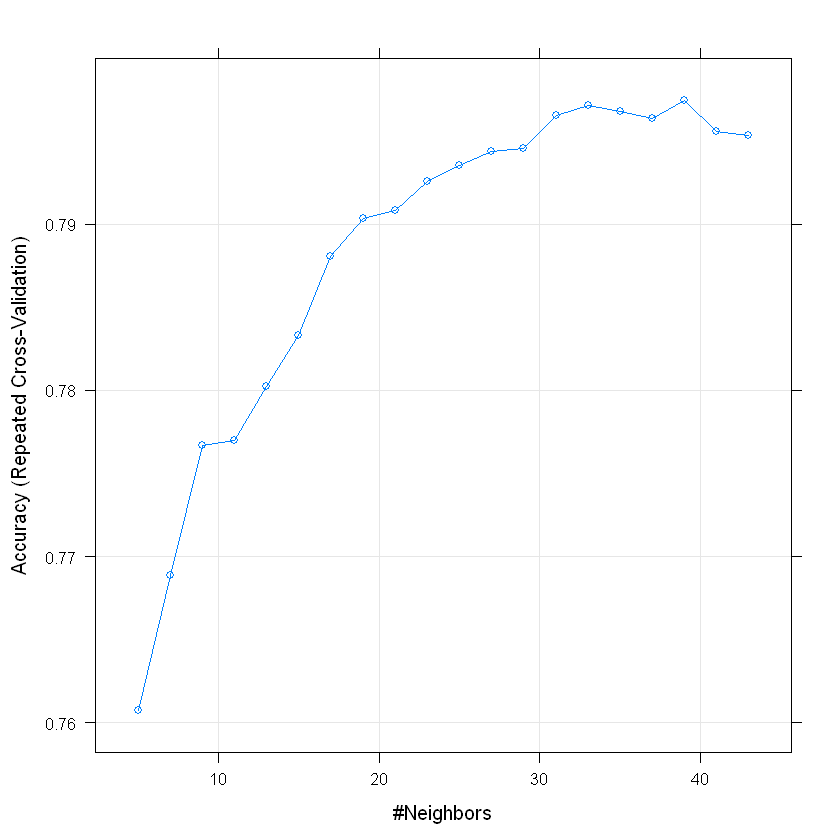

In [62]:
# Número de Vizinhos x Acurácia Modelo Knn 1
plot(knn_v1)

In [63]:
# Fazendo previsões
knnPredict1 <- predict(knn_v1, newdata = dados_teste_scaled)

In [64]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict1, dados_teste$Churn)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1142  185
         1  148  282
                                          
               Accuracy : 0.8105          
                 95% CI : (0.7913, 0.8286)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 4.175e-14       
                                          
                  Kappa : 0.5018          
                                          
 Mcnemar's Test P-Value : 0.04852         
                                          
            Sensitivity : 0.8853          
            Specificity : 0.6039          
         Pos Pred Value : 0.8606          
         Neg Pred Value : 0.6558          
             Prevalence : 0.7342          
         Detection Rate : 0.6500          
   Detection Prevalence : 0.7553          
      Balanced Accuracy : 0.7446          
                                          
       'Positive' Class : 0               
                        

### Modelo 2

In [65]:
# Variáveis mais importantes
importanceKnn<-varImp(knn_v1)
varImp(knn_v1)

ROC curve variable importance

                 Importance
tenure             100.0000
Contract            98.7701
TotalCharges        62.8677
MonthlyCharges      48.4451
PaperlessBilling    44.2543
Partner             36.3364
TechSupport         35.3752
OnlineSecurity      35.2291
Dependents          34.9335
PaymentMethod       25.2521
SeniorCitizen       23.8266
OnlineBackup        17.2035
DeviceProtection    15.7874
StreamingTV         15.2801
StreamingMovies     14.0027
InternetService      8.6208
MultipleLines        6.8180
gender               0.2823
PhoneService         0.0000

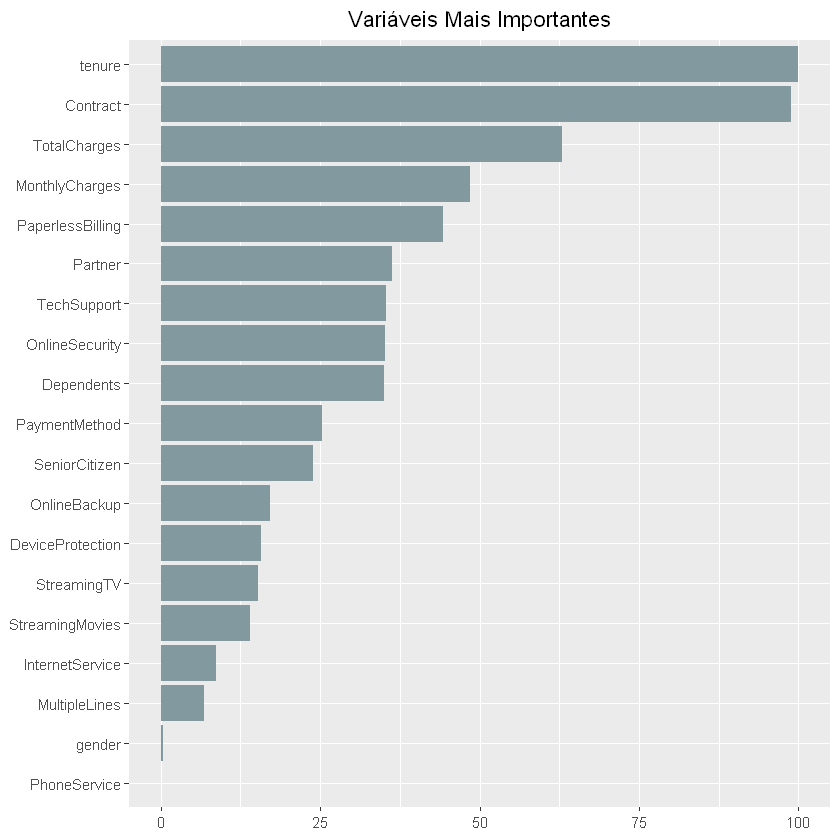

In [66]:
# Plotando variáveis mais importantes
importanceKnn %>%
ggplot(aes(importante)) +
geom_col(alpha=.5,fill="lightblue") +
labs(y=NULL,x=NULL,title="Variáveis Mais Importantes") +
theme(plot.title = element_text(hjust = 0.5))

In [67]:
# Criação do modelo2
knn_v2 <- train(Churn ~ tenure+Contract+TechSupport+OnlineSecurity+TotalCharges
                +OnlineBackup+DeviceProtection+MonthlyCharges+PaperlessBilling, 
                data = dados_treino_scaled, 
                method = "knn", 
                trControl = ctrl, 
                tuneLength = 20)

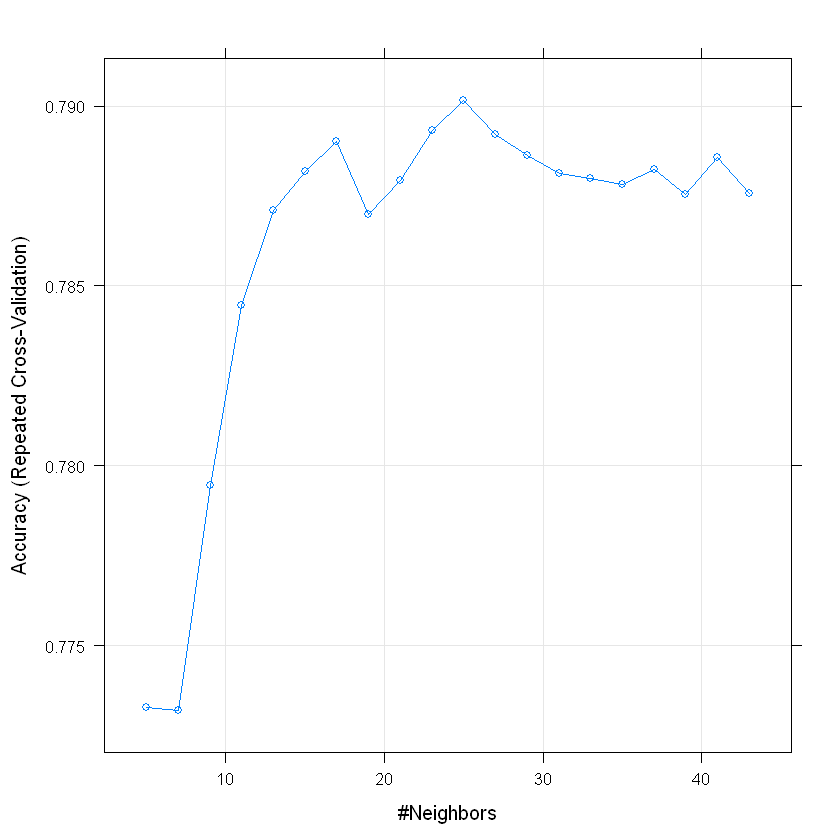

In [68]:
# Plotando modelo2
plot(knn_v2)

In [69]:
# Fazendo previsões
knnPredict2 <- predict(knn_v2, newdata = dados_teste_scaled)

In [70]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict2, dados_teste$Churn)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1162  235
         1  128  232
                                          
               Accuracy : 0.7934          
                 95% CI : (0.7737, 0.8121)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 4.882e-09       
                                          
                  Kappa : 0.4289          
                                          
 Mcnemar's Test P-Value : 2.643e-08       
                                          
            Sensitivity : 0.9008          
            Specificity : 0.4968          
         Pos Pred Value : 0.8318          
         Neg Pred Value : 0.6444          
             Prevalence : 0.7342          
         Detection Rate : 0.6614          
   Detection Prevalence : 0.7951          
      Balanced Accuracy : 0.6988          
                                          
       'Positive' Class : 0               
                        

### 3.2 RANDOM FOREST

### Modelo 1

In [71]:
# Primeira versão do modelo
Random_v1<- randomForest(Churn ~., dados_treino_scaled)

In [72]:
# Ver modelo 1
Random_v1


Call:
 randomForest(formula = Churn ~ ., data = dados_treino_scaled) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 21.18%
Confusion matrix:
     0   1 class.error
0 3483 390   0.1006971
1  727 675   0.5185449

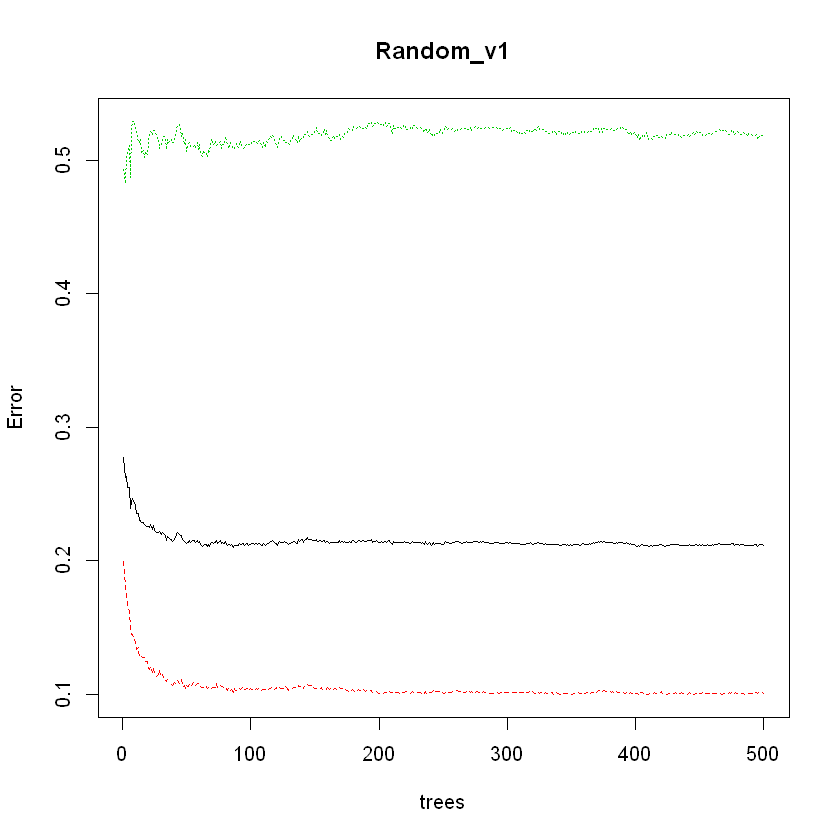

In [73]:
# Plotando o modelo
plot(Random_v1)

In [74]:
# Fazendo previsões
RandomPredict1<- predict(Random_v1,dados_teste_scaled)

In [75]:
# Criando a Confusion Matrix
confusionMatrix(RandomPredict1, dados_teste$Churn)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1176  222
         1  114  245
                                          
               Accuracy : 0.8088          
                 95% CI : (0.7896, 0.8269)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 1.548e-13       
                                          
                  Kappa : 0.471           
                                          
 Mcnemar's Test P-Value : 5.304e-09       
                                          
            Sensitivity : 0.9116          
            Specificity : 0.5246          
         Pos Pred Value : 0.8412          
         Neg Pred Value : 0.6825          
             Prevalence : 0.7342          
         Detection Rate : 0.6693          
   Detection Prevalence : 0.7957          
      Balanced Accuracy : 0.7181          
                                          
       'Positive' Class : 0               
                        

### Modelo 2

In [76]:
# Variáveis mais importantes
varImp(Random_v1)

,Overall
SeniorCitizen,37.71179
tenure,315.19897
MonthlyCharges,321.31080
TotalCharges,330.66289
gender,44.79818
Partner,40.62033
Dependents,35.69224
PhoneService,15.35335
MultipleLines,35.28550
InternetService,96.17537


In [77]:
# Criando modelo 2
Random_v2<- randomForest(Churn ~TotalCharges+MonthlyCharges+tenure+PaymentMethod
                         +Contract+InternetService, dados_treino_scaled)

In [78]:
# Ver modelo 2
Random_v2


Call:
 randomForest(formula = Churn ~ TotalCharges + MonthlyCharges +      tenure + PaymentMethod + Contract + InternetService, data = dados_treino_scaled) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 21.74%
Confusion matrix:
     0   1 class.error
0 3449 424   0.1094759
1  723 679   0.5156919

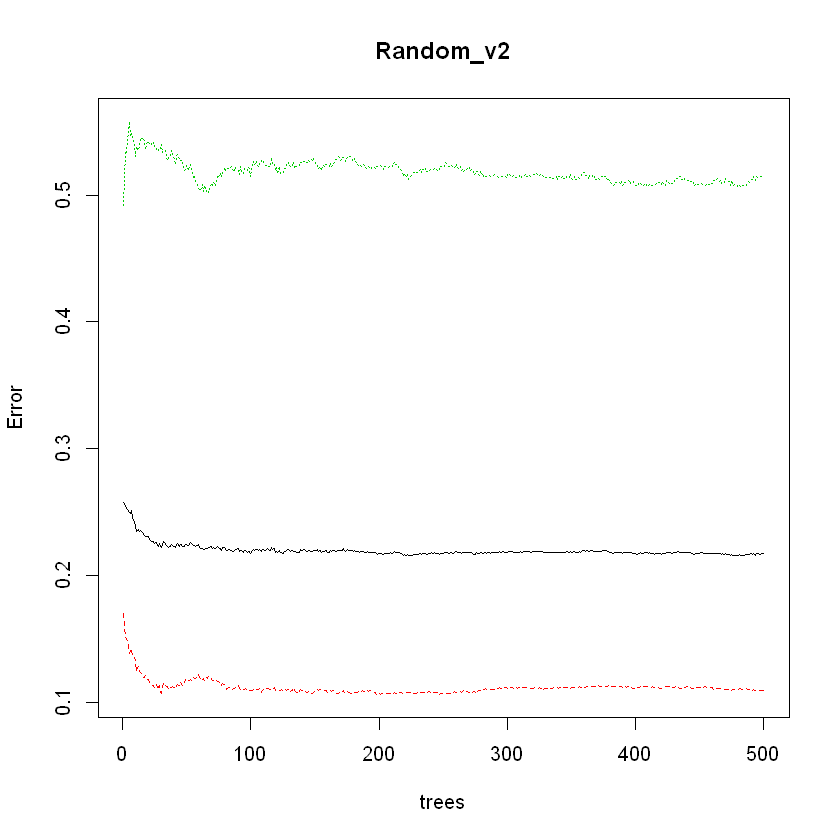

In [79]:
# Plotando modelo 2
plot(Random_v2)

In [80]:
# Fazendo previsões
RandomPredict2<- predict(Random_v2,dados_teste_scaled)

In [81]:
# Criando a Confusion Matrix
confusionMatrix(RandomPredict2, dados_teste$Churn)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1154  206
         1  136  261
                                         
               Accuracy : 0.8054         
                 95% CI : (0.786, 0.8236)
    No Information Rate : 0.7342         
    P-Value [Acc > NIR] : 1.932e-12      
                                         
                  Kappa : 0.4762         
                                         
 Mcnemar's Test P-Value : 0.0001907      
                                         
            Sensitivity : 0.8946         
            Specificity : 0.5589         
         Pos Pred Value : 0.8485         
         Neg Pred Value : 0.6574         
             Prevalence : 0.7342         
         Detection Rate : 0.6568         
   Detection Prevalence : 0.7740         
      Balanced Accuracy : 0.7267         
                                         
       'Positive' Class : 0              
                                         

### REGRESSÃO LOGÍSTICA

### Modelo 1

In [82]:
# Construindo o modelo de regressão logística
GLM_v1 <- glm(Churn ~., dados_treino_scaled, family = "binomial")

In [83]:
# Visualizando os detalhes do modelo
summary(GLM_v1)


Call:
glm(formula = Churn ~ ., family = "binomial", data = dados_treino_scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9110  -0.6894  -0.2893   0.7399   3.4455  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.58437    1.47260  -1.755  0.07926 .  
SeniorCitizen1     0.16699    0.09853   1.695  0.09011 .  
tenure            -1.61088    0.17663  -9.120  < 2e-16 ***
MonthlyCharges    -1.25591    1.11021  -1.131  0.25796    
TotalCharges       0.88230    0.18389   4.798 1.60e-06 ***
gender1            0.03279    0.07467   0.439  0.66061    
Partner1          -0.06983    0.08956  -0.780  0.43554    
Dependents        -0.06235    0.04735  -1.317  0.18789    
PhoneService1      0.06158    0.75441   0.082  0.93494    
MultipleLines1     0.44867    0.20647   2.173  0.02977 *  
InternetService1   1.75068    0.92900   1.884  0.05950 .  
InternetService2  -1.77321    0.93897  -1.888  0.05896 .  
OnlineSecurity1   -0.18

In [84]:
# Fazendo previsões
GlmPredict1 <- predict(GLM_v1, dados_teste_scaled, type = "response")
GlmPredict1 <- round(GlmPredict1)

In [85]:
# Confusion Matrix
confusionMatrix(table(GlmPredict1, dados_teste_scaled$Churn))

Confusion Matrix and Statistics

           
GlmPredict1    0    1
          0 1139  193
          1  151  274
                                          
               Accuracy : 0.8042          
                 95% CI : (0.7849, 0.8225)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 4.355e-12       
                                          
                  Kappa : 0.4835          
                                          
 Mcnemar's Test P-Value : 0.02707         
                                          
            Sensitivity : 0.8829          
            Specificity : 0.5867          
         Pos Pred Value : 0.8551          
         Neg Pred Value : 0.6447          
             Prevalence : 0.7342          
         Detection Rate : 0.6483          
   Detection Prevalence : 0.7581          
      Balanced Accuracy : 0.7348          
                                          
       'Positive' Class : 0               
                             

### Modelo 2

In [86]:
# Variáveis mais importantes
varImp(GLM_v1)

,Overall
SeniorCitizen1,1.69481930
tenure,9.12013115
MonthlyCharges,1.13123053
TotalCharges,4.79800803
gender1,0.43907748
Partner1,0.77974002
Dependents,1.31684626
PhoneService1,0.08162492
MultipleLines1,2.17307569
InternetService1,1.88447238


In [87]:
# Construindo o modelo de regressão logística v2
GLM_v2 <- glm(Churn ~tenure+Contract+PaperlessBilling+TotalCharges
              +PaymentMethod+MultipleLines, dados_treino_scaled, family = "binomial")

In [88]:
# Sumário modelo 2
summary(GLM_v2)


Call:
glm(formula = Churn ~ tenure + Contract + PaperlessBilling + 
    TotalCharges + PaymentMethod + MultipleLines, family = "binomial", 
    data = dados_treino_scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6178  -0.7613  -0.2999   0.8408   3.6777  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.60327    0.12068 -13.286  < 2e-16 ***
tenure            -2.04058    0.15343 -13.300  < 2e-16 ***
Contract1         -0.92052    0.11870  -7.755 8.82e-15 ***
Contract2         -1.80775    0.19209  -9.411  < 2e-16 ***
PaperlessBilling1  0.55270    0.08124   6.803 1.02e-11 ***
TotalCharges       1.39145    0.14190   9.806  < 2e-16 ***
PaymentMethod1    -0.11740    0.12671  -0.927  0.35417    
PaymentMethod2     0.49218    0.10452   4.709 2.49e-06 ***
PaymentMethod3    -0.39775    0.12467  -3.190  0.00142 ** 
MultipleLines1     0.29776    0.08653   3.441  0.00058 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

In [89]:
# Fazendo previsões
GlmPredict2 <- predict(GLM_v2, dados_teste_scaled, type = "response")
GlmPredict2 <- round(GlmPredict2)

In [90]:
# Confusion Matrix
confusionMatrix(table(GlmPredict2, dados_teste_scaled$Churn))

Confusion Matrix and Statistics

           
GlmPredict2    0    1
          0 1139  221
          1  151  246
                                          
               Accuracy : 0.7883          
                 95% CI : (0.7684, 0.8072)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 8.833e-08       
                                          
                  Kappa : 0.4303          
                                          
 Mcnemar's Test P-Value : 0.0003469       
                                          
            Sensitivity : 0.8829          
            Specificity : 0.5268          
         Pos Pred Value : 0.8375          
         Neg Pred Value : 0.6196          
             Prevalence : 0.7342          
         Detection Rate : 0.6483          
   Detection Prevalence : 0.7740          
      Balanced Accuracy : 0.7049          
                                          
       'Positive' Class : 0               
                             

### Sumário Avaliação dos Modelos

**1. KNN**  <br>
Modelo 1  <br>
Accuracy: 0.8105 <br>
Sensitivity : 0.8853  <br>
Specificity : 0.6039 

 <br>
Modelo 2  <br>
Accuracy: 0.7934 <br>
Sensitivity : 0.9008  <br>         
Specificity : 0.4968  <br> 
 <br>
 
**2. Random Forest**  <br>
Modelo 1 <br>
Accuracy: 0.8088 <br>
Sensitivity : 0.9116 <br>
Specificity : 0.5246  
   <br>
Modelo 2 <br>
Accuracy: 0.8054 <br>
Sensitivity : 0.8946  <br>
Specificity : 0.5589  <br>
<br>
**3. Regressão Logística**  <br>
Modelo 1 <br>
Accuracy: 0.8042 <br>
Sensitivity : 0.8829  <br>
Specificity : 0.5867 <br>
<br>
Modelo 2 <br>
Accuracy: 0.7883 <br>
Sensitivity : 0.8829   <br>
Specificity : 0.5268  <br>

**CONCLUSÃO:**
* Os modelos utilizando todas as variáveis independentes, nos três algorítmos, obtiveram desempenho superior aos modelos que utilizavam a seleção das variáveis mais importantes.<br>
* O algorítmo KNN obteve o melhor desempenho em comparação ao Random Forest e Regressão Logística, com acurácia de 0.8105.<br>
* Além de maior acurácia, o primeiro modelo do KNN demonstrou maior balanceamento entre sensibilidade e especificidade, com  0.8853 e  0.6039 respectivamente.<br>
* Os dois modelos do Random Forest obtiveram valores semelhantes de acurácia com 0.8088 e 0.8054, respectivamente.<br>
* A menor acurácia foi a do modelo 2 da Regressão logística, com o valor de 0.7883.<br>

DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias